# Solution to google hashcode challange 2018

https://storage.googleapis.com/coding-competitions.appspot.com/HC/2018/hashcode2018_qualification_task.pdf

## Task
Given a list of pre-booked rides in a city and a fleet of self-driving vehicles, assign the rides to vehicles, so
that riders get to their destinations on time.


For every ride that finishes on time (or early), you will earn points proportional to the distance of that ride;
plus an additional bonus if the ride also started precisely on time.


The first line of the input file contains the following integer numbers separated by single spaces:<br>
● R – number of rows of the grid (1 ≤ R ≤ 10000)<br>
● C – number of columns of the grid (1 ≤ C ≤ 10000)<br>
● F – number of vehicles in the fleet (1 ≤ F ≤ 1000)<br>
● N – number of rides (1 ≤ N ≤ 10000)<br>
● B – per-ride bonus for starting the ride on time (1 ≤ B ≤ 10000)<br>
● T – number of steps in the simulation (1 ≤ T ≤ 10 )<br>
<br>
N subsequent lines of the input file describe the individual rides, from ride 0 to ride N − 1 . Each line<br>
contains the following integer numbers separated by single spaces:<br>
● a – the row of the start intersection (0 ≤ a < R)<br>
● b – the column of the start intersection (0 ≤ b < C)<br>
● x – the row of the finish intersection (0 ≤ x < R)<br>
● y – the column of the finish intersection (0 ≤ y < C)<br>
● s – the earliest start(0 ≤ s < T)<br>
● f – the latest finish (0 ≤ f ≤ T) , (f ≥ s + |x − a| + |y − b|)<br>
○ note that f can be equal to T – this makes the latest finish equal to the end of the simulation<br>

For example file can look like this:<br>
3 4 2 3 2 10 3 rows, 4 columns, 2 vehicles, 3 rides, 2 bonus and 10 steps<br>
0 0 1 3 2 9 ride from [0, 0] to [1, 3], earliest start 2, latest finish 9<br>
1 2 1 0 0 9 ride from [1, 2] to [1, 0], earliest start 0, latest finish 9<br>
2 0 2 2 0 9 ride from [2, 0] to [2, 2], earliest start 0, latest finish 9<br>






In [1]:
# imports
import random
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt

from deap import base, creator
from deap import tools
from deap import algorithms

In [2]:
# Reading from file 

file = open("./files/b_should_be_easy.in", "r")

data = np.loadtxt(file, delimiter=" ", dtype=np.int32).tolist()
# print(data)


# Remove first row of list so only rides are left
rides = []

for i in range(1, len(data), 1):
    rides.append(data[i])

# print(rides)
# type(rides)

In [3]:
# Assigning variables
city_x = data[0][0]
city_y = data[0][1]
number_of_cars = data[0][2]
number_of_rides = data[0][3]
bonus = data[0][4]
steps = data[0][5]

print(number_of_cars)
print(number_of_rides)

100
300


In [4]:
# Creating object for storing configurations
toolbox = base.Toolbox()

In [5]:
# Configuring fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

1. Each individual has a lenght of number of rides
2. To each ride has assigned a car 

In [6]:
toolbox.register("attribute", random.randint, 0, number_of_cars-1)
# Number of attributes is equal to number of rides 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=number_of_rides)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

In [7]:
# This is only for checking if that works
# A single individual is generated
ind = toolbox.individual()
# print("Individual: ", ind)

# The population is initialised. It will have a total of X individuals. It is generated as a list of individuals.
pop = toolbox.population(n=5)

# The population is printed: 10 individuals of 5 genes each
# print("Population: ",pop)

### Fitness Function



#### Manhattan Distance

https://machinelearningmastery.com/distance-measures-for-machine-learning/

The Manhattan distance, also called the Taxicab distance or the City Block distance, calculates the distance between two real-valued vectors.

Manhattan distance is calculated as the sum of the absolute differences between the two vectors:
 - ManhattanDistance = sum for i to N sum |v1[i] – v2[i]|

In [8]:
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

In [9]:
# FOR LATER

class Car:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.step = 0
        self.value = 0

In [10]:
# # FOR LATER
class Ride:
    def __init__(self):
        self.x = 0

In [11]:
# # initialisation of the cars
# cars = []
# for i in range(0, number_of_cars, 1):
#     cars.append([0] * 4)  

3 4 2 3 2 10 3 rows, 4 columns, 2 vehicles, 3 rides, 2 bonus and 10 steps<br>
0 0 1 3 2 9 ride from [0, 0] to [1, 3], earliest start 2, latest finish 9

In [12]:
def fitness(ind):
#     print("=======start=======")
# ind = [0, 1, 2]
    
    # initialize cars
    # Car definition: [X, Y, Step, Value] 
    cars = []
    for i in range(0, number_of_cars, 1):
        cars.append([0] * 4)   

#     print(cars)
    # keeps track of what ride are we 
    counter = 0

    for ride in rides:
#         print(ride)
#         print(ind)
        # choosing car for a ride from individual
    
        car = cars[ind[counter]]
#         print(ind[counter])

        # position of the car
        car_pos = [car[0], car[1]]
#         print("car_pos=", car_pos)

        # starting position of ride
        cord_start = [ride[0], ride[1]]
#         print("cord_start=", cord_start)

        # ending position of ride
        cord_end = [ride[2], ride[3]]
#         print("cord_end=", cord_end)

        # calculate distance between car and starting position
        dist_to_start = manhattan_distance(car_pos, cord_start)
#         print("dist_to_start=", dist_to_start)

        # adding distance needed to go to starting point to steps
        car[2] += dist_to_start

        # if car is on time or earlier add bonus
        if(car[2] <= ride[4]):
            car[3] += bonus

        # if car is earlier set to starting time
        if(car[2] < ride[4]):
#             print("car wait for step: ", ride[4])
            car[2] = ride[4]

        # calculate distance between starting point of the trip and 
        dist_trip = manhattan_distance(cord_start, cord_end)
#         print("dist_trip=", dist_trip)

        # add distance of the trip to steps
        car[2] += dist_trip

        # if steps needed to complete ride are less or equal to 
        # finish of ride add points
#         print("car accomplised ride in step: ", car[2])
#         print("ride was supose to end: ", ride[5])
        if(ride[5] > car[2]):
#             print("success")
            car[3] += dist_trip

        # set coordinates of the ending to the actual position
        # of the car
        car[0] = cord_end[0]
        car[1] = cord_end[1]

        cars[ind[counter]] = car
#         print(car)
        counter += 1
#         print("===CARS===")
#         print(cars)
#         print("==================")
    
    value = 0
    for car in cars:
        value += car[3]
#     print("value=", value)
#     print(cars)
    return (value, )


In [13]:
# fitness([0, 1, 1, 0])

### Configure Genetic algorithms parameters

In [14]:
# we can experiment with different parameters 
toolbox.register("select", tools.selTournament, tournsize=3) # selections
toolbox.register("mate", tools.cxOnePoint)                   # crossing
toolbox.register("mutate", tools.mutUniformInt, low=0, up=number_of_cars-1, indpb=0.2)      # mutation

# define how each individual will be evaluated
# fitness function defined above will be used 
toolbox.register("evaluate", fitness)

### Statistic configuration 

In [15]:
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean) 
stats.register("std", np.std) 
stats.register("min", np.min) 
stats.register("max", np.max) 

### Execution of the Algorithm

In [16]:
# The population is initialised with X individuals.
population = toolbox.population(n=30)
# print(population)

# The algorithm that allows the evolution of the solutions is called
population, logbook = algorithms.eaSimple(population, toolbox, 
                                    cxpb=0.7, mutpb=0.2, # Probabilidades de cruce y mutacion
                                    ngen=20, verbose=False, stats=stats) # Numero de generaciones a completar y estadisticas a recoger

# For each generation, the logbook structure stores a summary of the algorithm's progress.
print("Results: ")
print(logbook)

print("Best Solution: ")
print(tools.selBest(population,1)[0])

Results: 
gen	nevals	avg    	std    	min   	max   
0  	30    	94597.8	4239.19	84665 	103363
1  	24    	96892.9	3770.99	86716 	103363
2  	28    	97597.7	4159.72	88110 	104480
3  	23    	100165 	3382.02	90922 	104614
4  	22    	99529  	5232.1 	84957 	105437
5  	24    	100580 	4575.21	88695 	107101
6  	25    	101093 	5298.91	87091 	107838
7  	20    	104184 	3247.88	95379 	108982
8  	29    	104680 	3252.25	97791 	107838
9  	23    	106774 	2319.07	96720 	110298
10 	28    	106977 	2201.23	100686	110298
11 	24    	106291 	3174.78	97775 	110298
12 	24    	106761 	3720.52	93566 	111730
13 	21    	106853 	3677.01	98461 	111544
14 	21    	108689 	2253.34	102787	114067
15 	16    	108857 	2663.34	101285	112334
16 	19    	109711 	3210.91	95787 	114656
17 	29    	109110 	4060.49	99587 	114212
18 	26    	111237 	3304.18	100987	114212
19 	27    	112006 	3275.1 	102025	114212
20 	26    	112376 	3154.95	103729	114681
Best Solution: 
[32, 30, 52, 82, 19, 49, 22, 87, 95, 14, 65, 61, 34, 59, 61, 58, 10, 85,

[]

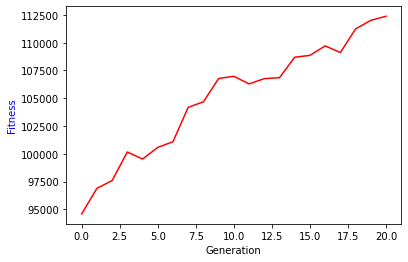

In [17]:
# The data is retrieved from the log
gen = logbook.select("gen")
avgs = logbook.select("avg")
mins = logbook.select("min") 
maxes = logbook.select("max") 

# A figure is set to draw
fig = plt.figure()
    
# The average of the fitness value for each generation is represented
ax1 = plt.gca()
line1 = ax1.plot(gen, avgs, "r-", label="Average Fitness")    
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

plt.plot()